In [ ]:
import torch
# import torch_srcnn.train_srgan as SRGAN
# import torch_srcnn.train_srresnet as SRRESNet
# import torch_srcnn.super_resolve as SuperResolve
import utils as srutil
import datasets as srdatasets

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
import os
import numpy as np
import nibabel as nib
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

In [ ]:
test_load = nib.load('images/IXI-T1/IXI002-Guys-0828-MPRAGESEN_-s256_-0301-00003-000001-01.nii').get_fdata()
test_load.shape

In [ ]:
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = test_load.shape[-1]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    print(img)
    axs.flat[idx].imshow(ndi.rotate(test_load[:, :, img], 90), cmap='gray')
    axs.flat[idx].axis('off')
        
plt.tight_layout()
plt.show()

In [ ]:
norm_img = srutil.convert_image(test_load[128, :, :], source='pil', target='imagenet-norm').unsqueeze(0).to(device)

In [ ]:
import os
import shutil
import random

def split_images(input_folder, output_folder, test_percentage=10):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # List all files in the input folder
    all_images = [file for file in os.listdir(input_folder) if file.endswith('.png')]

    # Calculate the number of images to move for testing
    num_images_for_testing = int(len(all_images) * (test_percentage / 100))

    # Randomly select images for testing
    images_for_testing = random.sample(all_images, num_images_for_testing)

    # Move selected images to the testing folder
    for i, image_name in enumerate(images_for_testing):
        source_path = os.path.join(input_folder, image_name)
        destination_path = os.path.join(output_folder, image_name)
        shutil.move(source_path, destination_path)
        print(f"{round((i / num_images_for_testing * 100), 2)}% done......")

# Example usage:
input_folder = 'D:/Medical_Imagery_SRCNN/images/IXI-T1-train'
output_folder = 'D:/Medical_Imagery_SRCNN/images/IXI-T1-test'

split_images(input_folder, output_folder, test_percentage=10)

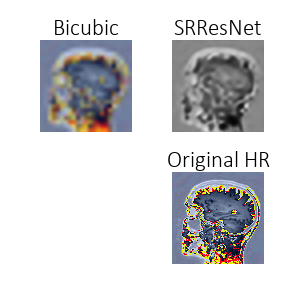

In [1]:
from super_resolve import visualize_sr

test_image = './adversarial_examples/FGSM/perturbed_img_11.png'
visualize_sr(test_image)

In [6]:
import torch
from datasets import SRDataset

data_folder = './'  # folder with JSON data files
crop_size = 96  # crop size of target HR images
scaling_factor = 4  # the scaling factor for the generator; the input LR images will be downsampled from the target HR images by this factor

batch_size = 64  # batch size
start_epoch = 0  # start at this epoch
iterations = 50000  # number of training iterations
workers = 4  # number of workers for loading data in the DataLoader

train_dataset = SRDataset(data_folder,
                              split='train',
                              crop_size=crop_size,
                              scaling_factor=scaling_factor,
                              lr_img_type='imagenet-norm',
                              hr_img_type='[-1, 1]')
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=workers,
                                               pin_memory=True)  # note that we're passing the collate function here

# Total number of epochs to train for
int(iterations // len(train_loader) + 1)

46

In [4]:
len(train_loader)

1098